# NAME: ARGHYA BERA (OBI/N1/IP3052)

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

**Import Libraries:**
pandas: Used for data manipulation and analysis.
train_test_split: From scikit-learn, used to split the dataset into training and testing sets.
LinearRegression: Also from scikit-learn, used to create a linear regression model.
mean_squared_error: A metric to evaluate the performance of the regression model.
matplotlib.pyplot: Used for data visualization.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising.csv


In [ ]:
# Load the dataset
data = pd.read_csv('Advertising.csv')

In [ ]:
# Explore the dataset
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [ ]:
# Select features (X) and target variable (y)
features = data[['TV', 'Radio', 'Newspaper']]
target = data['Sales']


Step 4: Visualizing the relationship between features and the target variable


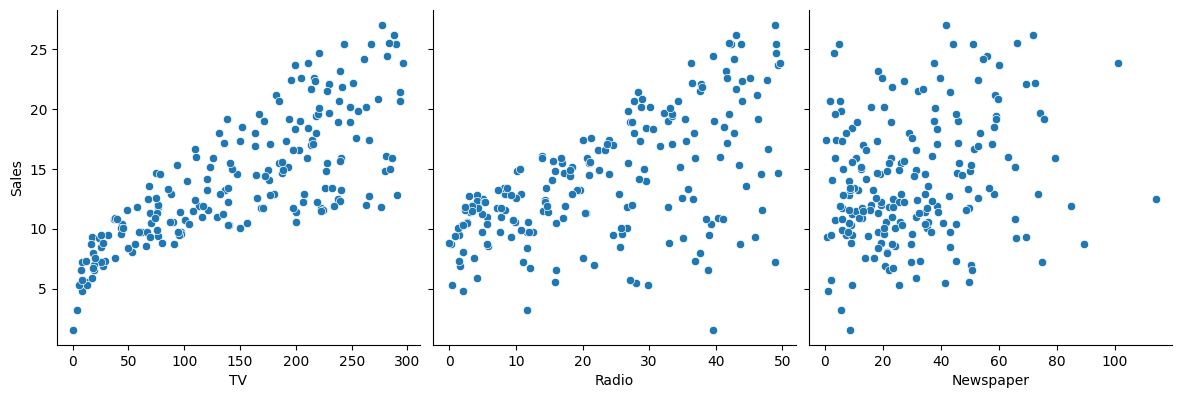

In [ ]:
# Visualize the relationship between features and target variable
print("\nStep 4: Visualizing the relationship between features and the target variable")
sns.pairplot(data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Feature Scaling (using StandardScaler)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


 Visualizing the training and testing sets after scaling


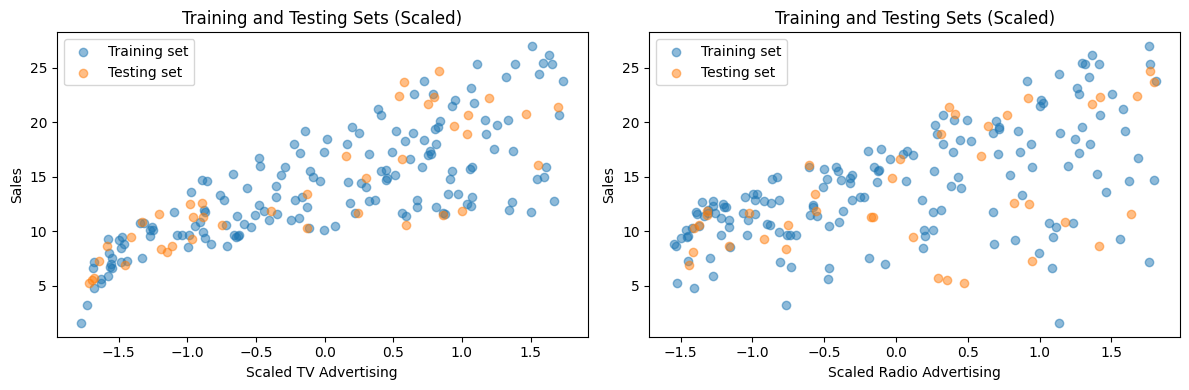

In [ ]:
# Visualize the training and testing sets after scaling
print("\n Visualizing the training and testing sets after scaling")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.scatter(X_train_scaled[:, 0], y_train, label='Training set', alpha=0.5)
ax1.scatter(X_test_scaled[:, 0], y_test, label='Testing set', alpha=0.5)
ax1.set_title('Training and Testing Sets (Scaled)')
ax1.set_xlabel('Scaled TV Advertising')
ax1.set_ylabel('Sales')
ax1.legend()

ax2.scatter(X_train_scaled[:, 1], y_train, label='Training set', alpha=0.5)
ax2.scatter(X_test_scaled[:, 1], y_test, label='Testing set', alpha=0.5)
ax2.set_title('Training and Testing Sets (Scaled)')
ax2.set_xlabel('Scaled Radio Advertising')
ax2.set_ylabel('Sales')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Create and train machine learning models (Linear Regression, Ridge, Lasso, Random Forest)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

for model_name, model in models.items():
    print(f"\n Evaluating {model_name}")

    # Cross-validation for model evaluation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_scores)

    print(f'Mean RMSE: {np.mean(rmse_scores)}')

    # Training the model on the full training set
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)


 Evaluating Linear Regression
Mean RMSE: 1.6820526567367253

 Evaluating Ridge Regression
Mean RMSE: 1.684355897174321

 Evaluating Lasso Regression
Mean RMSE: 2.235189691638485

 Evaluating Random Forest
Mean RMSE: 0.8185025664819676


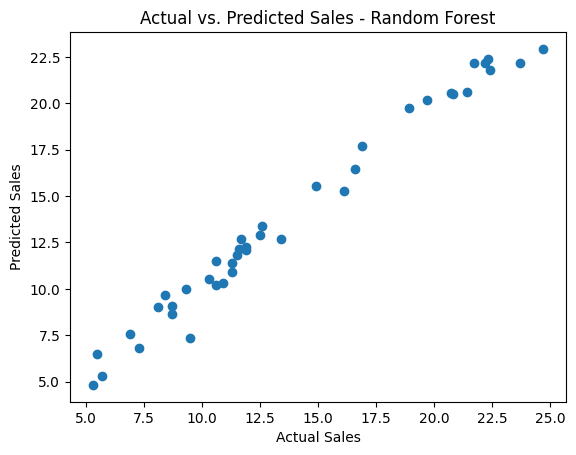


Feature Importance:
TV: 0.6248103070046955
Radio: 0.3622008907155749
Newspaper: 0.012988802279729702


In [ ]:
    # Visualize the linear regression model
    plt.scatter(y_test, predictions)
    plt.xlabel('Actual Sales')
    plt.ylabel('Predicted Sales')
    plt.title(f'Actual vs. Predicted Sales - {model_name}')
    plt.show()

    # Feature importance (for Random Forest)
    if model_name == 'Random Forest':
        feature_importances = model.feature_importances_
        features_list = features.columns
        feature_importance_dict = dict(zip(features_list, feature_importances))
        sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

        print("\nFeature Importance:")
        for feature, importance in sorted_feature_importance:
            print(f"{feature}: {importance}")